<a href="https://colab.research.google.com/github/wespitia9/Ejemplo-de-stable-diffusion/blob/main/Ejemplo_de_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stable Diffusion se refiere a un tipo de proceso estocástico utilizado en el modelado y análisis de datos, que se caracteriza por tener fluctuaciones estables en sus datos. Estos procesos son útiles en la modelación de fenómenos dinámicos complejos, como la evolución de redes neuronales o el análisis de series temporales. En resumen, Stable Diffusion es una herramienta matemática que se utiliza en IA para entender mejor el comportamiento de sistemas complejos.

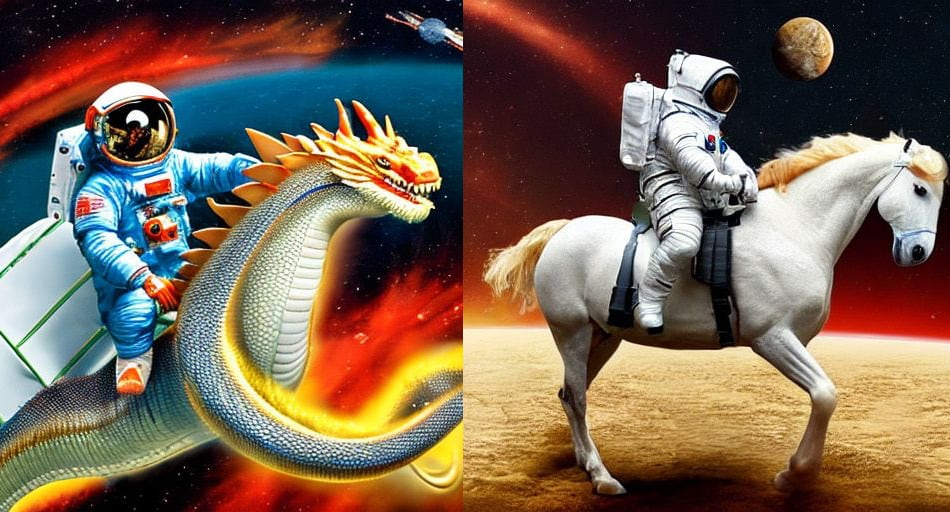

Se instalan la librerias necesarias para la ejecución del proyecto. Las librerias que se instalan son:



*   `diffusers`
*   `transformers`
*   `accelerate`
*   `mediapy`
*   `triton`
*   `scipy`
*   `ftfy`
*   `spacy==3.4.4`

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy triton scipy ftfy spacy==3.4.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00


El paquete xformers es obligatorio para poder crear varias imágenes de 768x768.

In [2]:
%pip install -q xformers==0.0.16rc425

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 17.9 MB/s eta 0:00:00


Este código crea una variable llamada `model_id` que contiene una cadena de texto que representa el identificador o nombre de un modelo de lenguaje pre-entrenado.

En este caso particular, el modelo se llama `"dreamlike-photoreal-2.0"` y es proporcionado por la organización `"dreamlike-art"`.

Este modelo de lenguaje pre-entrenado probablemente se utilizó para tareas de generación de texto, como la creación de descripciones de imágenes o la generación de textos creativos.

In [3]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"

Importamos varias clases de la librería diffusers, que se utilizarán para definir diferentes tipos de programadores para los algoritmos de difusión en una red de nodos.

Estas clases son:

*   `PNDMScheduler`
*   `DDIMScheduler`
*   `LMSDiscreteScheduler`
*   `EulerDiscreteScheduler`
*   `DPMSolverMultistepScheduler`

In [4]:
from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler

scheduler = None

El siguiente código utiliza las librerías `mediapy` y `torch` y la clase `StableDiffusionPipeline` de la librería `diffusers` para crear un pipeline que se puede utilizar para generar texto a partir de imágenes.

Primero, el código importa la librería `mediapy` y la llama `media`. Luego, se define la variable `device` con el valor "cuda". Esta variable se utilizará posteriormente para especificar si el modelo se ejecutará en una GPU o en la CPU.

Después, se utiliza una estructura `if` para verificar si el `model_id` comienza con "stabilityai/". Si es así, la variable `model_revision` se establece en "fp16". Si no, se establece en `None`.

Luego, otra estructura `if` se utiliza para verificar si la variable `scheduler` se estableció anteriormente en algún objeto. Si `scheduler` es `None`, el código crea una instancia de la clase `StableDiffusionPipeline` utilizando el método `from_pretrained` y especificando el `model_id`, el tipo de tensor de PyTorch (torch.float16) y la variable model_revision. Si `scheduler` tiene un objeto, entonces el método `from_pretrained` se llama de manera similar, pero se le pasa el objeto `scheduler`.

A continuación, el código mueve el pipeline a la `device` especificada anteriormente, y habilita la opción de memoria eficiente para la atención de `xformers`.

Finalmente, se establece el valor de `image_length` en función del `model_id`. Si `model_id` termina con "-base", se establece en 512. De lo contrario, se establece en 768.

En resumen, este código crea un pipeline de difusión estable a partir del `model_id` especificado y lo configura para su uso en la GPU. Además, establece la longitud de la imagen en función del modelo que se esté utilizando.

In [5]:
import mediapy as media
import torch
from diffusers import StableDiffusionPipeline

device = "cuda"

if model_id.startswith("stabilityai/"):
  model_revision = "fp16"
else:
  model_revision = None

if scheduler is None:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      torch_dtype=torch.float16,
      revision=model_revision,
      )  
else:
  pipe = StableDiffusionPipeline.from_pretrained(
      model_id,
      scheduler=scheduler,
      torch_dtype=torch.float16,
      revision=model_revision,
      )

pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

if model_id.endswith('-base'):
  image_length = 512
else:
  image_length = 768

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]


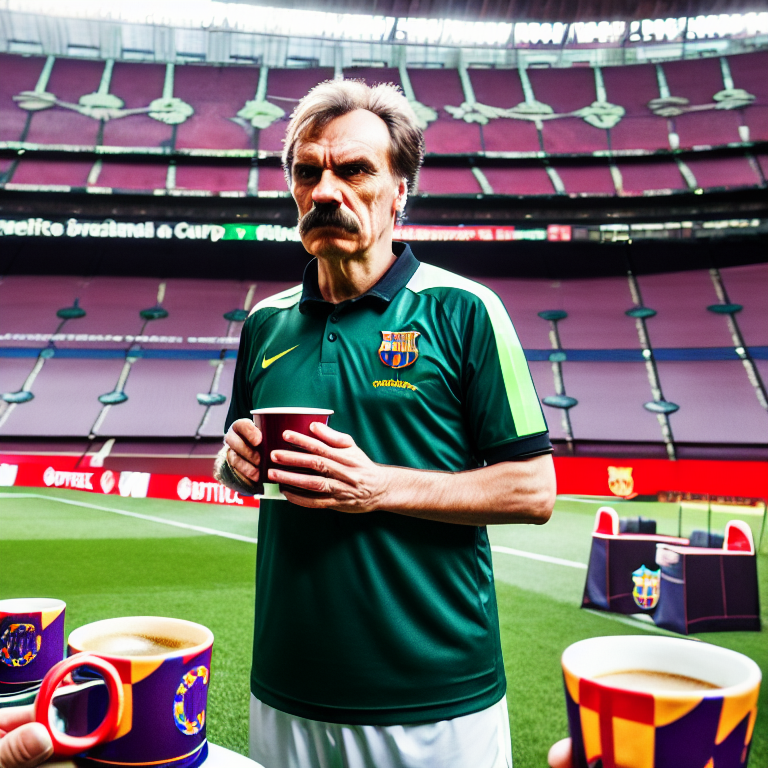
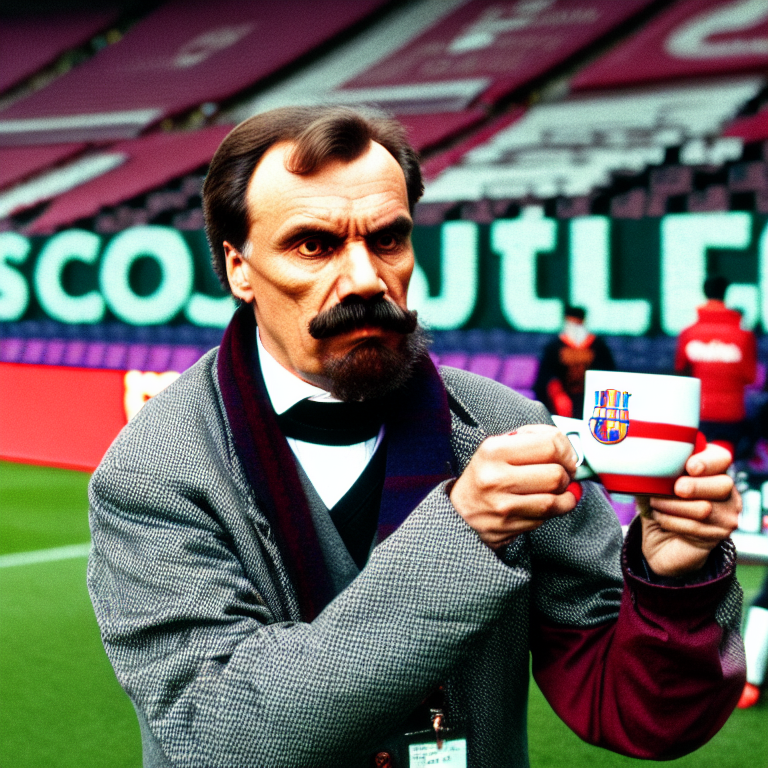
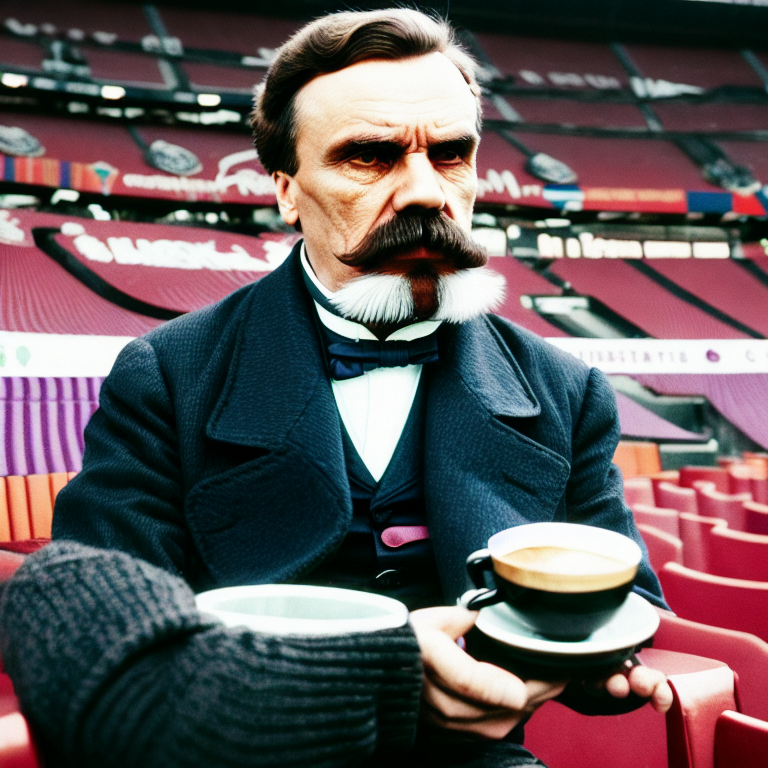
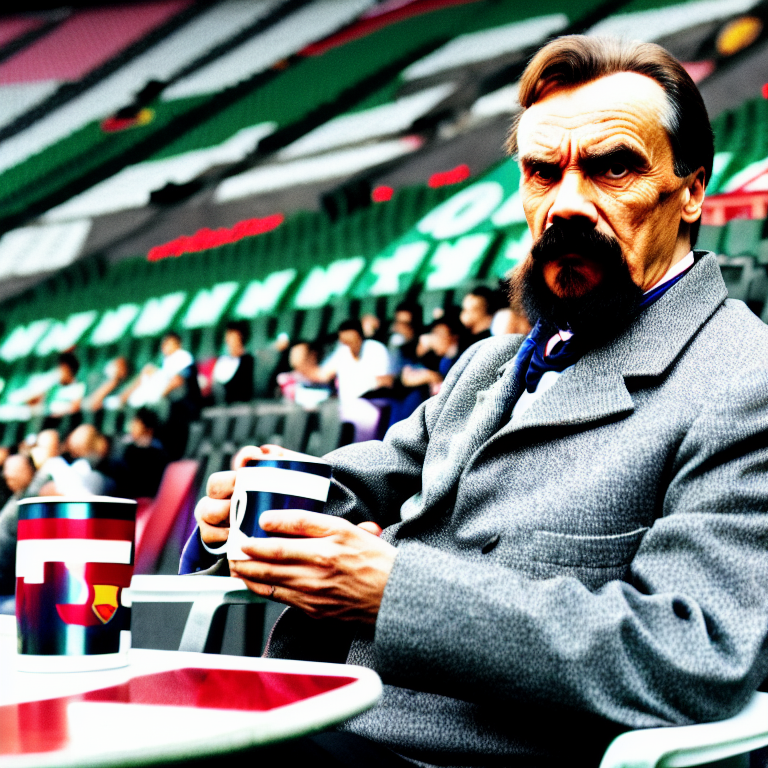

In [10]:
prompt = "friedrich nietzsche having coffee at the spotify camp nou, stadium of Futbol Club Barcelona"
remove_safety = False
num_images = 4

if remove_safety:
  negative_prompt = None
  pipe.safety_checker = None
else:
  negative_prompt = "nude, naked"

images = pipe(
    prompt,
    height = image_length,
    width = image_length,
    num_inference_steps = 25,
    guidance_scale = 9,
    num_images_per_prompt = num_images,
    negative_prompt = negative_prompt,
    ).images
    
media.show_images(images)
images[0].save("output.jpg")